# 20 Newsgroups Dataset: Text Classification and Clustering

1. Part 1: Text Pre-processing and Embedding Comparison 
   - Preprocessing steps correctly implemented and explained 
   - Comparison of word2vec, GloVe, and OpenAI embeddings
   - Discussion on the embeddings that provide better semantic understanding

2. Part 2: Text Classification Model 
   - Correct implementation of chosen classification model
   - Comprehensive discussion on the choice of model, including its advantages and disadvantages

3. Part 3: Text Clustering Model 
   - Correct implementation of chosen clustering model
   - Comprehensive discussion on the choice of model, including its pros and cons

4. Part 4: Model Evaluation 
   - Appropriate metrics chosen and correctly used to evaluate models
   - Comprehensive discussion on the choice of metrics

5. Part 5: Model Improvement Discussion 
   - Comprehensive discussion on potential improvements, including handling unbalanced data, dealing with slang, abbreviations or typos, and addressing context and word disambiguation challenges

 Dataset Link : http://qwone.com/~jason/20Newsgroups/

In [ ]:
import pandas as pd
import numpy as np
import gensim

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
newsgroups_data = fetch_20newsgroups(subset='all')

# Part 1: Text Pre-processing and Embedding Comparison

In [4]:
df = pd.DataFrame(newsgroups_data.data)

In [5]:
df.columns = ["data"]

In [6]:
df.head()

,data
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...


In [7]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## Removing all URL's and email ID from the text data

In [8]:
def remove_websites_emails(string):
    string=re.sub(r'([\w\.\+]+)@([\w\.]+)','',string)
    string=re.sub(r'([\w\.\+]+)\.([\w\.]+)','',string)
    
    return string

In [9]:
df['emails']=df['data'].apply(remove_websites_emails)

## Using Regex to retain only alphabets in the dataset

In [10]:
#then regex and remove all non alphabets
import re
reg=[]
for i in range(len(df)):
    reg.append(re.sub('[^A-Za-z]+', ' ',df['emails'][i]))
df['regexed']=reg

In [11]:
#remove stop words
def remove_stop(sentence):
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    lis2=[]
    sentence=sentence.split()
    for w in sentence:
        if w not in stop_words:
            lis2.append(w)
    return ' '.join(lis2)
#perform lemmatization
def lemma(sentence):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    word=lemmatizer.lemmatize(sentence)
    return "".join(word).lower()

In [12]:
df['stopwords_removed']=df['regexed'].apply(remove_stop)

In [13]:
df['lemmatized']=df['stopwords_removed'].apply(lemma)

## Viewing the Dataframe 

In [14]:
df

,data,emails,regexed,stopwords_removed,lemmatized
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,From: Mamatha Devineni Ratnam <>\nSubject: Pen...,From Mamatha Devineni Ratnam Subject Pens fans...,From Mamatha Devineni Ratnam Subject Pens fans...,from mamatha devineni ratnam subject pens fans...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,From: (Matthew B Lawson)\nSubject: Which high...,From Matthew B Lawson Subject Which high perfo...,From Matthew B Lawson Subject Which high perfo...,from matthew b lawson subject which high perfo...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,From: hilmi- (Hilmi Eren)\nSubject: Re: ARMENI...,From hilmi Hilmi Eren Subject Re ARMENIA SAYS ...,From hilmi Hilmi Eren Subject Re ARMENIA SAYS ...,from hilmi hilmi eren subject re armenia says ...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,"From: (Guy Dawson)\nSubject: Re: IDE vs SCSI,...",From Guy Dawson Subject Re IDE vs SCSI DMA and...,From Guy Dawson Subject Re IDE vs SCSI DMA det...,from guy dawson subject re ide vs scsi dma det...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,From: Alexander Samuel McDiarmid <>\nSubject: ...,From Alexander Samuel McDiarmid Subject driver...,From Alexander Samuel McDiarmid Subject driver...,from alexander samuel mcdiarmid subject driver...
...,...,...,...,...,...
18841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,From: (Jim Zisfein) \nSubject: Re: Migraines ...,From Jim Zisfein Subject Re Migraines and scan...,From Jim Zisfein Subject Re Migraines scans Di...,from jim zisfein subject re migraines scans di...
18842,From: rdell@cbnewsf.cb.att.com (richard.b.dell...,From: ()\nSubject: Re: A question about 120VA...,From Subject Re A question about VAC outlet wi...,From Subject Re A question VAC outlet wiring O...,from subject re a question vac outlet wiring o...
18843,From: westes@netcom.com (Will Estes)\nSubject:...,From: (Will Estes)\nSubject: Mounting CPU Coo...,From Will Estes Subject Mounting CPU Cooler in...,From Will Estes Subject Mounting CPU Cooler ve...,from will estes subject mounting cpu cooler ve...
18844,From: steve@hcrlgw (Steven Collins)\nSubject: ...,From: (Steven Collins)\nSubject: Re: Sphere f...,From Steven Collins Subject Re Sphere from poi...,From Steven Collins Subject Re Sphere points O...,from steven collins subject re sphere points o...


In [29]:
import numpy
import gensim

In [16]:
from gensim.models import Word2Vec

# Printing the possible target names

In [17]:
newsgroups_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [29]:
df['target']=(newsgroups_data.target)

In [19]:
df

,data,emails,regexed,stopwords_removed,lemmatized,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,From: Mamatha Devineni Ratnam <>\nSubject: Pen...,From Mamatha Devineni Ratnam Subject Pens fans...,From Mamatha Devineni Ratnam Subject Pens fans...,from mamatha devineni ratnam subject pens fans...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,From: (Matthew B Lawson)\nSubject: Which high...,From Matthew B Lawson Subject Which high perfo...,From Matthew B Lawson Subject Which high perfo...,from matthew b lawson subject which high perfo...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,From: hilmi- (Hilmi Eren)\nSubject: Re: ARMENI...,From hilmi Hilmi Eren Subject Re ARMENIA SAYS ...,From hilmi Hilmi Eren Subject Re ARMENIA SAYS ...,from hilmi hilmi eren subject re armenia says ...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,"From: (Guy Dawson)\nSubject: Re: IDE vs SCSI,...",From Guy Dawson Subject Re IDE vs SCSI DMA and...,From Guy Dawson Subject Re IDE vs SCSI DMA det...,from guy dawson subject re ide vs scsi dma det...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,From: Alexander Samuel McDiarmid <>\nSubject: ...,From Alexander Samuel McDiarmid Subject driver...,From Alexander Samuel McDiarmid Subject driver...,from alexander samuel mcdiarmid subject driver...,4
...,...,...,...,...,...,...
18841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,From: (Jim Zisfein) \nSubject: Re: Migraines ...,From Jim Zisfein Subject Re Migraines and scan...,From Jim Zisfein Subject Re Migraines scans Di...,from jim zisfein subject re migraines scans di...,13
18842,From: rdell@cbnewsf.cb.att.com (richard.b.dell...,From: ()\nSubject: Re: A question about 120VA...,From Subject Re A question about VAC outlet wi...,From Subject Re A question VAC outlet wiring O...,from subject re a question vac outlet wiring o...,12
18843,From: westes@netcom.com (Will Estes)\nSubject:...,From: (Will Estes)\nSubject: Mounting CPU Coo...,From Will Estes Subject Mounting CPU Cooler in...,From Will Estes Subject Mounting CPU Cooler ve...,from will estes subject mounting cpu cooler ve...,3
18844,From: steve@hcrlgw (Steven Collins)\nSubject: ...,From: (Steven Collins)\nSubject: Re: Sphere f...,From Steven Collins Subject Re Sphere from poi...,From Steven Collins Subject Re Sphere points O...,from steven collins subject re sphere points o...,1


# Performing Train Test Split

In [20]:
from sklearn.model_selection import *
X_train_, X_test_, y_train, y_test = train_test_split(df['lemmatized'], df['target'], test_size=0.2, random_state=42)

In [21]:
X_train_

12056    from patrick l mahan subject re is newsgroup d...
10359    from max j rochlin subject re speeding ticket ...
1266     from mark robert thorson subject re centi mill...
4602     uunet olivea sgigate sgiblab nntp keith subjec...
7341     organization university notre dame office univ...
                               ...                        
11284    from sanjay sinha subject re new organization ...
11964    from jon livesey subject re islam dress code w...
5390     from josip nmi simunovic subject ibm colordisp...
860      from john kerney subject re flyers notes keywo...
15795    from charley wingate subject re a little too s...
Name: lemmatized, Length: 15076, dtype: object

## Word2Vec initialization

In [22]:
sentences = [sentence.split() for sentence in X_train_]
model= Word2Vec(sentences,min_count=5,workers=4,vector_size=300)

## Finding Similar words using Word2Vec

In [23]:
model.wv.most_similar('car')

[('dealer', 0.8447083234786987),
 ('ford', 0.807127058506012),
 ('cars', 0.7977603077888489),
 ('bikes', 0.7764068245887756),
 ('bike', 0.7758487462997437),
 ('toyota', 0.7735735774040222),
 ('owner', 0.7689455151557922),
 ('motorcycle', 0.7588866353034973),
 ('seat', 0.7416196465492249),
 ('truck', 0.7406015396118164)]

## Glove Embeddings

In [24]:
#Download glove.6B.300d.txt on your local machine where the notebook is located
import numpy as np
embeddings_dict = {}
with open("glove.6B.300d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))
from scipy import spatial
find_closest_embeddings(embeddings_dict["car"])[:5]
len(embeddings_dict)


400001

## Finding Similar words using Glove

In [60]:
find_closest_embeddings(embeddings_dict["car"])[:5]

['car', 'cars', 'vehicle', 'truck', 'driver']

## Vectorized Sample output of words using Glove

In [95]:
embeddings_dict["car"]

array([ 4.6443e-01,  3.7730e-01, -2.1459e-01, -5.0768e-01, -2.4576e-01,
        8.1340e-02,  1.0145e-01,  2.5155e-01, -3.6152e-01, -1.6030e+00,
        2.8219e-01,  3.6653e-01,  4.4611e-01,  2.7950e-01,  4.7722e-02,
        3.0087e-01, -1.6226e-01, -2.6055e-02, -2.6815e-01, -4.6282e-01,
        2.5012e-01,  6.0389e-01,  1.5111e-01, -6.2823e-02, -9.6755e-02,
       -3.0548e-01, -1.1376e-01,  5.3914e-01,  1.0966e-01, -7.0618e-01,
       -6.6316e-01,  4.3559e-01, -4.8631e-02,  2.7755e-01, -4.8685e-01,
        1.1938e-01, -5.4538e-01, -2.9563e-01,  3.4470e-02,  5.3187e-01,
       -1.5880e-03,  4.1692e-01, -2.0742e-01, -3.7833e-02,  4.3333e-01,
        4.7521e-02,  8.3507e-01, -6.5088e-02, -2.9974e-01,  4.7139e-03,
        1.2339e-01, -5.0660e-01,  2.5870e-01,  2.1264e-01,  1.9132e-01,
        5.4204e-01, -1.1385e-01, -4.2384e-01, -2.7808e-01, -1.5105e-01,
       -6.2104e-01,  2.7678e-01, -5.4974e-02,  1.8479e-02, -1.1744e-01,
        3.3029e-01, -3.5251e-01, -2.1953e-01,  5.5140e-02,  1.69

In [96]:
embeddings_dict["organization"]

array([-4.5708e-02, -4.0809e-03, -1.7185e-01,  1.5738e-01, -1.5451e-01,
        1.2943e-01, -3.7171e-01,  2.8772e-01, -1.7756e-01, -1.7418e+00,
        6.7797e-01,  1.9532e-01, -2.1047e-01,  3.1278e-02, -2.7233e-01,
       -9.3993e-02,  2.6921e-01,  3.8492e-01, -5.4009e-01, -1.6337e-01,
        3.3560e-01,  4.3018e-01,  5.0056e-02,  1.7440e-02, -5.0737e-02,
        1.4192e-01,  1.3098e-01,  1.1379e-01, -3.7349e-01,  2.5893e-01,
        3.5349e-01,  1.4958e-01, -5.8564e-03, -2.0755e-01, -1.9341e-01,
        4.6301e-02,  3.9277e-01, -2.7126e-02, -3.0178e-01, -5.8979e-01,
       -2.5481e-02,  1.2335e-01,  4.4033e-01,  3.4279e-01, -1.6574e-01,
       -2.5972e-01, -3.3398e-01,  4.9242e-02, -6.2763e-02, -3.9097e-01,
       -7.2519e-02,  2.4629e-01,  5.1521e-02,  4.7446e-02, -3.8024e-01,
       -1.7127e-01, -3.0275e-01,  7.2957e-01, -4.5588e-02, -2.3266e-01,
        4.4511e-02,  3.6898e-01,  6.8784e-02,  3.0762e-02, -5.9271e-01,
        9.1623e-02,  1.9705e-02,  2.3280e-01, -2.8901e-01,  2.95

In [25]:
# defining function for vectorizing
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [26]:
from nltk.tokenize import word_tokenize

# Vectorizing using Word2Vec

In [27]:
X_train = np.array([vectorize(sentence) for sentence in X_train_])
X_test = np.array([vectorize(sentence) for sentence in X_test_])

### NOTE: 
'X_train_' above contains the sentences obtained after train test split and 'X_train' contains the vectorized values of sentences after applying Word2Vec

## Vectorized Sample output of words using Word2Vec

In [93]:
model.wv['car']

array([ 2.90429682e-01,  4.77668285e-01, -9.15562749e-01,  9.33213055e-01,
       -6.25844061e-01, -2.55893767e-01,  1.28600085e+00,  3.01438332e-01,
        5.54651976e-01,  3.24603587e-01,  6.29668459e-02, -9.85187292e-01,
       -2.13604406e-01, -1.25976849e+00, -3.76847535e-01, -7.07550406e-01,
        1.14788187e+00,  8.89001846e-01, -3.15846562e-01,  6.05957866e-01,
        1.26348689e-01, -8.83335248e-02,  5.45544744e-01, -8.70136499e-01,
       -5.72991610e-01, -1.02361299e-01, -4.90992785e-01, -1.03513205e+00,
       -5.72573125e-01, -1.26521337e+00, -1.26520002e+00,  1.47642642e-01,
        1.38687119e-01, -6.20796204e-01,  4.61247534e-01,  2.66343474e-01,
       -5.31782925e-01,  4.17155683e-01,  1.75441299e-02, -2.42143422e-01,
        5.80182016e-01, -4.60431218e-01, -2.38182887e-01, -2.90836066e-01,
        3.87120306e-01, -1.23114102e-01,  9.24300626e-02, -4.64651026e-02,
       -9.44405571e-02,  2.77529627e-01, -9.51672196e-01, -1.06568706e+00,
       -2.57623255e-01,  

In [94]:
model.wv['organization']

array([ 1.73947561e+00,  1.09711790e+00, -9.91174042e-01,  1.68532252e+00,
       -8.54491293e-01, -2.39773750e+00,  7.17000782e-01,  1.02148914e+00,
        3.57971132e-01,  6.44855946e-02, -3.54254752e-01,  1.13939196e-02,
        8.11206102e-02,  1.73709512e+00,  1.96916962e+00, -4.84796345e-01,
       -6.00178778e-01,  3.14054847e+00,  1.28770089e+00, -6.27213061e-01,
       -1.10774279e+00, -1.29701924e+00,  7.78899729e-01,  1.05527902e+00,
       -8.47912192e-01,  4.09191990e+00,  4.60481904e-02,  1.32149294e-01,
       -2.92521656e-01,  8.02163258e-02,  1.69491434e+00, -1.99957967e-01,
        9.80901361e-01, -1.66304439e-01,  6.05097413e-01,  1.09963775e+00,
        2.01495320e-01,  2.51007080e+00,  1.69549918e+00, -9.46707428e-01,
       -1.43007660e+00, -1.00825238e+00,  2.02303433e+00,  1.01850438e+00,
       -1.05812454e+00,  7.75122583e-01, -6.49875045e-01,  1.33738518e+00,
        1.98155022e+00,  3.07354599e-01, -1.04701109e-01,  2.15811193e-01,
        3.93915027e-01, -

### Discussion on the embeddings 

The two models wordtoVEC and Glove used showed different results. This was different due to the way they are trained.The  Glove model is based on corpus of global dataset. Word2vec on the other hand leverages co-occurance within local context.

# Part 2: Text Classification Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,CuDNNLSTM,Bidirectional
from keras.regularizers import l2
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler    

# Classification

### Applying Logistic Regression to Word2Vec's output


There are several classification algorithms which have been used for text classifications namely SVM, Random Forest, Naive Baye's, Logistic Regression (SU Hassan, J Ahamed, K Ahmad - Sustainable Operations and Computers, 2022 - Elsevier). In this assignment, Logistic Regression was chosen as the it is quick to train data, and it works well for categorical data. It uses a Simple parameter estimation technique. The main drawback is the method has limitations of using linear data. As a future scope, comparative analysis of analysis of various algorithm is planned.

In [31]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Sumitra\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### SVM 

In [33]:
st_x= StandardScaler()    
X_train_1= st_x.fit_transform(X_train)    
X_test_1= st_x.transform(X_test)  

In [52]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=101)  
classifier.fit(X_train_1, y_train)  

SVC(kernel='linear', random_state=101)

# Glove Embeddings Initialization

In [2]:
embeddings_dict = {}
with open("glove.6B.300d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

C:\Users\david\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\david\miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\david\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
embeddings_dict['car']

array([ 4.6443e-01,  3.7730e-01, -2.1459e-01, -5.0768e-01, -2.4576e-01,
        8.1340e-02,  1.0145e-01,  2.5155e-01, -3.6152e-01, -1.6030e+00,
        2.8219e-01,  3.6653e-01,  4.4611e-01,  2.7950e-01,  4.7722e-02,
        3.0087e-01, -1.6226e-01, -2.6055e-02, -2.6815e-01, -4.6282e-01,
        2.5012e-01,  6.0389e-01,  1.5111e-01, -6.2823e-02, -9.6755e-02,
       -3.0548e-01, -1.1376e-01,  5.3914e-01,  1.0966e-01, -7.0618e-01,
       -6.6316e-01,  4.3559e-01, -4.8631e-02,  2.7755e-01, -4.8685e-01,
        1.1938e-01, -5.4538e-01, -2.9563e-01,  3.4470e-02,  5.3187e-01,
       -1.5880e-03,  4.1692e-01, -2.0742e-01, -3.7833e-02,  4.3333e-01,
        4.7521e-02,  8.3507e-01, -6.5088e-02, -2.9974e-01,  4.7139e-03,
        1.2339e-01, -5.0660e-01,  2.5870e-01,  2.1264e-01,  1.9132e-01,
        5.4204e-01, -1.1385e-01, -4.2384e-01, -2.7808e-01, -1.5105e-01,
       -6.2104e-01,  2.7678e-01, -5.4974e-02,  1.8479e-02, -1.1744e-01,
        3.3029e-01, -3.5251e-01, -2.1953e-01,  5.5140e-02,  1.69

In [18]:
x=df['lemmatized']

In [19]:
token = Tokenizer()
token.fit_on_texts(x)
seq = token.texts_to_sequences(x)

In [20]:
pad_seq = pad_sequences(seq,maxlen=300)

In [21]:
len(pad_seq)

18846

In [22]:
vocab_size = len(token.word_index)+1

In [23]:
vocab_size

103689

In [24]:
embedding_matrix = np.zeros((vocab_size,300))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embeddings_dict.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|██████████████████████████████████████████████████████████████████████| 103688/103688 [00:00<00:00, 500223.71it/s]


In [25]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.13292   ,  0.16985001, -0.1436    , ..., -0.23778   ,
         0.14766   ,  0.62901998],
       [-0.67962003, -0.094339  , -0.16272999, ...,  0.13891999,
        -0.14372   ,  0.46075001],
       ...,
       [-0.42315999,  0.13628   , -0.26969001, ..., -0.041841  ,
        -0.44093001, -0.34128001],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
len(embedding_matrix)

103689

In [27]:
len(pad_seq)

18846

In [30]:
y=df['target']

In [31]:
y

0        10
1         3
2        17
3         3
4         4
         ..
18841    13
18842    12
18843     3
18844     1
18845     7
Name: target, Length: 18846, dtype: int32

In [32]:
labels=to_categorical(np.asarray(df['target']))

In [33]:
labels.shape

(18846, 20)

The LSTM model depicted is a specialized type of recurrent neural network designed to tackle the long-term dependency problem of traditional RNNs.This selective reading and writing of information within the LSTM unit is a key advantage effectively addresses the issues of gradient explosion and gradient vanishing, which are common challenges in training recurrent neural networks. By controlling the flow of information, LSTM can prevent these problems and ensure more stable and effective training, making it a powerful solution for capturing long-term dependencies in sequential data.In text  classification, BiLSTM considers the context of the text, and uses the output of the CNN pooling layer as the input of two LSTM networks with opposite time series. The forward LSTM obtains the above information of the input sequence, and the backward LSTM  obtains the above information of the input sequence. The context information of the input sequence is then calculated by vector splicing to obtain the final hidden layer representation. Based on past work done, it is seen that the model works  on complete-text dataset, long-text dataset, and short-text dataset.

# Bi-LSTM approach for classification

In [35]:
model = Sequential()
model.add(Embedding(vocab_size,300,weights = [embedding_matrix],input_length=300,trainable = False))
model.add(Bidirectional(CuDNNLSTM(300)))
model.add(Dropout(0.2, input_shape=(128,)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(20,activation = 'softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
#history = model.fit(epochs = 5,batch_size=64,validation_split=0.2)

In [36]:
print(labels.shape)

(18846, 20)


In [37]:
import matplotlib.pyplot as plt
history=model.fit(pad_seq, np.array(labels), validation_split=0.3, epochs = 10)
training_loss = history.history['loss']
test_loss = history.history['val_loss']

Epoch 1/10
413/413 [==============================] - 95s 221ms/step - loss: 2.3091 - accuracy: 0.2274 - val_loss: 1.8541 - val_accuracy: 0.3203
Epoch 2/10
413/413 [==============================] - 90s 219ms/step - loss: 1.5685 - accuracy: 0.4470 - val_loss: 1.1909 - val_accuracy: 0.5727
Epoch 3/10
413/413 [==============================] - 93s 225ms/step - loss: 0.9832 - accuracy: 0.6555 - val_loss: 0.9612 - val_accuracy: 0.6592
Epoch 4/10
413/413 [==============================] - 94s 227ms/step - loss: 0.7192 - accuracy: 0.7531 - val_loss: 0.7404 - val_accuracy: 0.7625
Epoch 5/10
413/413 [==============================] - 95s 230ms/step - loss: 0.5455 - accuracy: 0.8229 - val_loss: 0.6146 - val_accuracy: 0.8099
Epoch 6/10
413/413 [==============================] - 94s 227ms/step - loss: 0.3724 - accuracy: 0.8777 - val_loss: 0.5956 - val_accuracy: 0.8205
Epoch 7/10
413/413 [==============================] - 94s 227ms/step - loss: 0.2688 - accuracy: 0.9108 - val_loss: 0.6233 - val_ac

# Part 3: Text Clustering Model

The K-means algorithm was preferred due to simplicity of implementation and low computational complexity.The primary challenge with K-means is the selection of initial clusters which impacts the algorithm's performance, especially for large datasets, making it difficult to determine the optimal number of clusters to begin with. Random selection of initial cluster centers can lead to minimal local convergence due to its greedy nature. Another limitation lies in its reliance on the Euclidean distance metric to measure similarity between data objects, which makes the algorithm less robust in detecting clusters with non-linear shapes and presents challenges in identifying overlapping clusters. To address this issue, we used elbow method to find the optimal K value for clustering the data in our sample data set. 

In [98]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Dimensions of the data are reduced from 300 to 2

In [100]:
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(X_train)
PCA_result

array([[-0.05781518,  0.5763892 ],
       [-0.09887088,  0.08099066],
       [-0.46798447,  0.04944545],
       ...,
       [ 1.1530032 , -1.8558486 ],
       [ 0.7525164 ,  1.2094462 ],
       [-1.1569824 , -0.17014204]], dtype=float32)

### Using the elbow method to find the optimal k-value

In [101]:
wcss = []
for i in range(1,30):
    kmodel = KMeans(n_clusters = i, init = "k-means++")
    kmodel.fit(X_train)
    wcss.append(kmodel.inertia_)

C:\Users\Sumitra\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sumitra\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sumitra\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sumitra\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

### Plotting the Number of Clusters vs WCSS

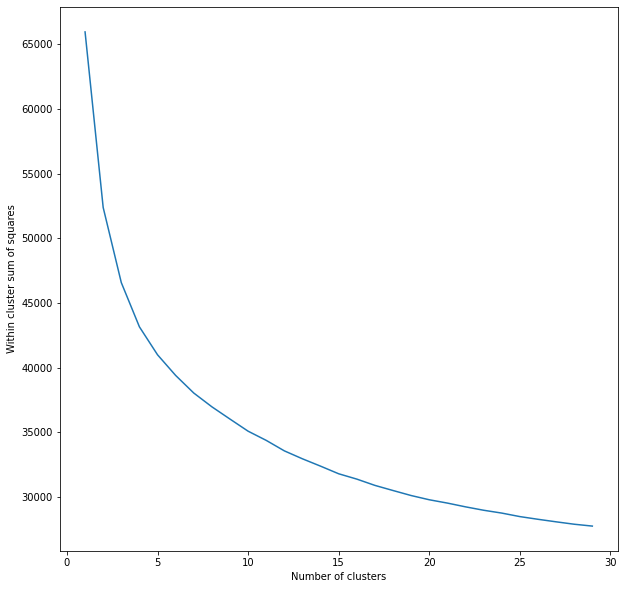

In [102]:
plt.figure(figsize=(10,10))
plt.plot(range(1,30), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show() 

### Performing k means clustering for k=10  (optimum value as per Elbow method)

In [103]:
kmodel = KMeans(n_clusters = 10, init = "k-means++")

In [104]:
label = kmodel.fit_predict(PCA_result)
uniq = np.unique(label)

C:\Users\Sumitra\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
print(label)
print(uniq)

[3 3 3 ... 0 2 1]
[0 1 2 3 4 5 6 7 8 9]


### K-means output

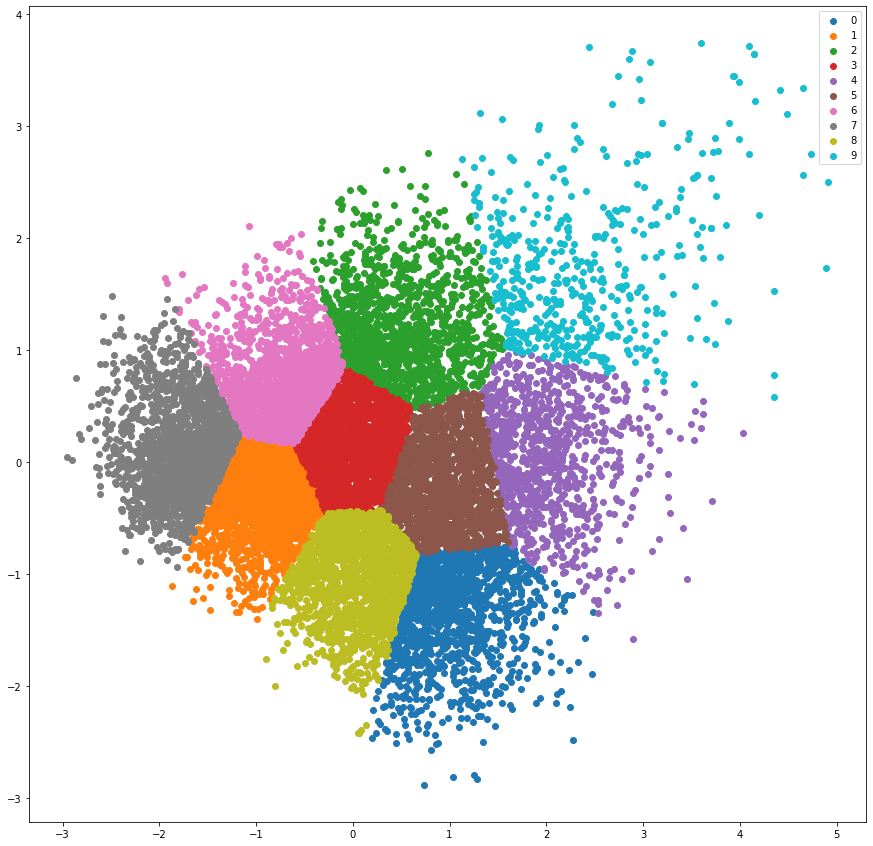

In [106]:
plt.figure(figsize=(15,15))

for i in uniq:
    plt.scatter(PCA_result[label == i , 0] , PCA_result[label == i , 1] , label = i)
plt.legend()
plt.show()

### Feeding predicted output labels to respective sentences in dataframe

In [109]:
df_train=X_train_.to_frame()
df_train['predicted_label']=label
df_train.sort_values(by=['predicted_label'], ascending=True)

,lemmatized,predicted_label
12023,from richard arbanas subject using xt pwr sppl...,0
1809,from buz owen subject performa internal modem ...,0
2128,from conrad winchester subject re motorola xc ...,0
13752,from des herriott subject xdm xsession woes ke...,0
12237,from subject gifs tek x organization hahnemann...,0
...,...,...
17718,from andreas dunker subject mail organization ...,9
5308,from zauberer subject re please read organizat...,9
6854,from holly ks subject re roland juno synthesiz...,9
9136,from mark andrew shumka subject canucks score ...,9


# Part 4: Model Evaluation

## 1. Evaluating the logistic regression model that was coupled with Word2Vec

### Accuracy score and classification report with details for each class

In [115]:
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy: 0.6705570291777189


              precision    recall  f1-score   support

           0       0.50      0.55      0.53       151
           1       0.58      0.60      0.59       202
           2       0.66      0.66      0.66       195
           3       0.51      0.49      0.50       183
           4       0.61      0.50      0.55       205
           5       0.73      0.74      0.74       215
           6       0.70      0.67      0.69       193
           7       0.63      0.57      0.60       196
           8       0.59      0.74      0.65       168
           9       0.71      0.78      0.75       211
          10       0.81      0.77      0.79       198
          11       0.85      0.82      0.84       201
          12       0.60      0.60      0.60       202
          13       0.70      0.79      0.74       194
          14       0.78      0.78      0.78       189
          15       0.69      0.87      0.77       202
          16       0.69      0.76      0.73       

### Since there are 20 classes, we will have 20 points in the clf.intercept_ array

In [118]:
print(clf.intercept_)

[-1.40904698 -0.10162339 -1.69226561 -1.79204118 -0.75942931  0.36643652
  0.32924188  0.61294848  3.22057567 -0.29900608 -2.38737364 -1.69385778
  1.19575356  4.06800308  0.37004454  0.6953027  -0.57282774  0.6386177
 -0.01407157 -0.77538086]


In [119]:
print(clf.coef_)

[[-0.91534487  0.5206699   0.64646926 ...  0.14020264  0.34010157
   0.00223432]
 [-0.59466838 -0.64948326 -0.09151114 ...  0.0192739  -0.22357174
   0.83619364]
 [-0.57885843 -0.14500305 -0.24113273 ...  0.17665316 -0.75671225
  -0.28251588]
 ...
 [-0.23809234  0.06247494  0.0127818  ...  0.72373443  0.22441699
   0.89363741]
 [ 0.24261724 -1.35540306 -0.18983783 ... -0.06803441  0.16654739
   0.75096021]
 [-1.15663196  0.6403106   0.4295155  ...  0.1268698   0.57282727
  -0.34232302]]


### Confusion Matrix

In [123]:
cf=confusion_matrix(y_test, y_pred)
print(cf)

[[ 83   1   1   0   0   0   0   1   3   2   0   0   0   2   2  31   2   7
    9   7]
 [  1 121  15   5   4  19   4   0   1   1   0   3   6   9   9   1   0   0
    0   3]
 [  1  13 129  16   5  15   5   0   3   0   0   0   3   3   0   0   0   0
    1   1]
 [  0   9  25  90  30   3   4   4   2   3   0   1  12   0   0   0   0   0
    0   0]
 [  0  10   4  38 103   6  12  10   0   2   0   2  13   1   4   0   0   0
    0   0]
 [  0  28   9   2   2 159   1   1   3   2   0   1   0   2   3   1   0   0
    1   0]
 [  0   3   3  16  10   2 130   8   1   6   1   1   8   1   2   0   0   0
    0   1]
 [  0   2   1   0   3   1   7 111  42   2   0   1  15   2   0   1   4   1
    3   0]
 [  1   0   0   1   0   1   4  17 124   4   1   0   3   5   0   0   2   1
    4   0]
 [  1   0   0   0   0   1   3   0   3 165  32   0   0   0   2   1   0   0
    3   0]
 [  0   1   0   0   0   1   1   2   4  33 152   0   0   0   0   0   2   1
    1   0]
 [  0   3   2   1   0   1   1   0   0   2   0 165   6   2   3   0

### Heatmap

<Axes: >

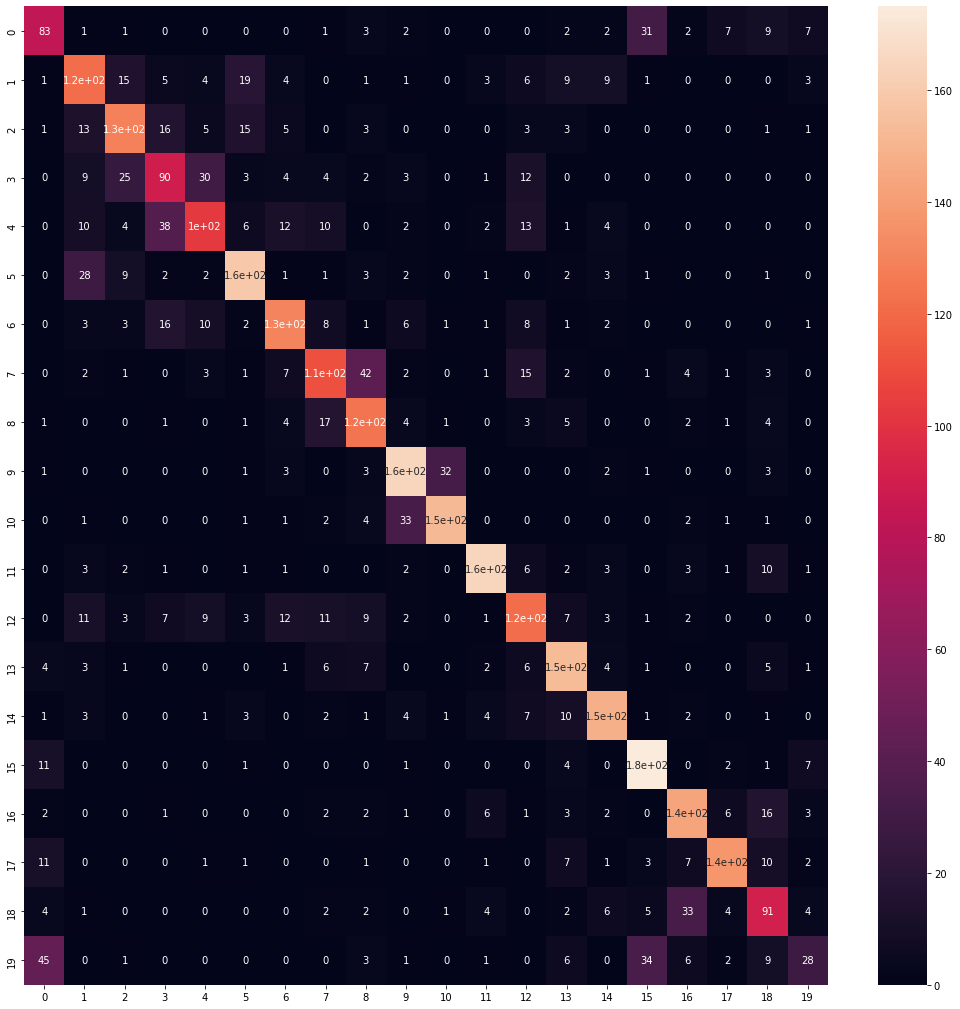

In [124]:
fig, ax = plt.subplots(figsize=(18,18))  
sns.heatmap(cf,annot=True)

### Percentage wise heatmap

<Axes: >

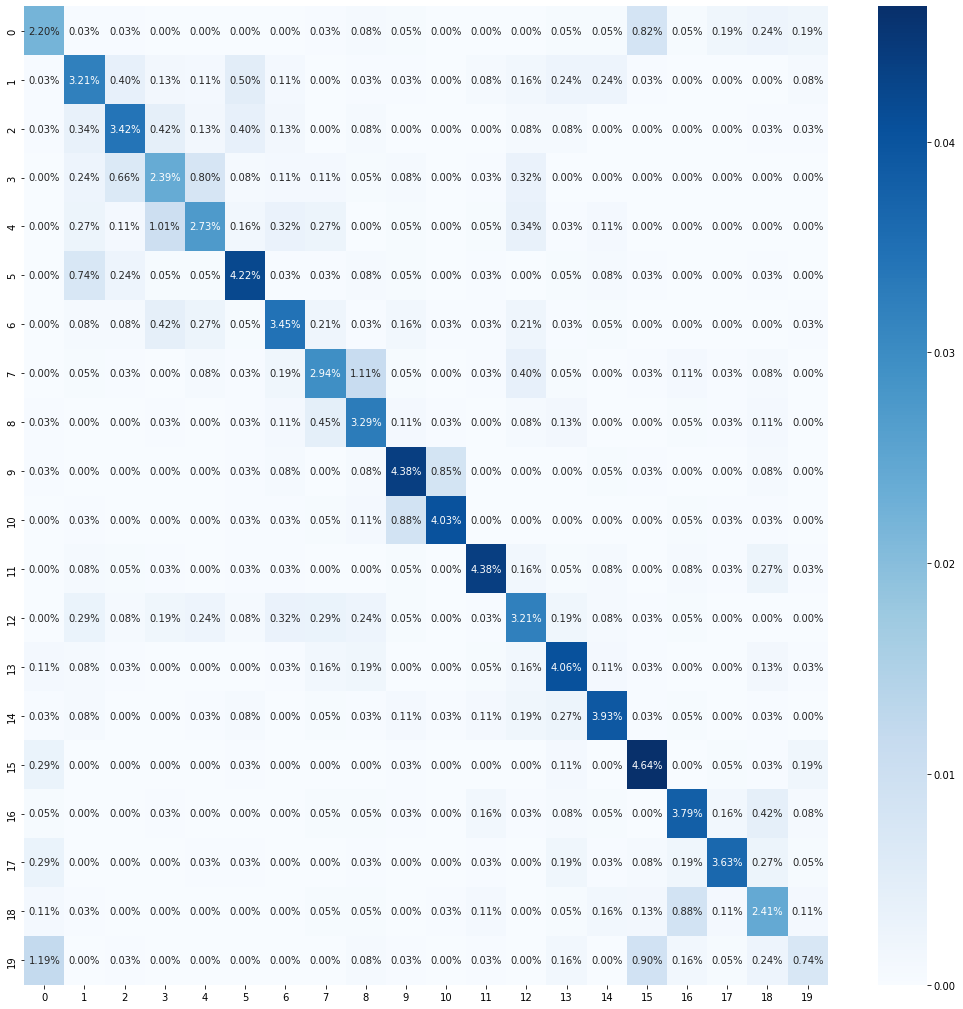

In [122]:
fig, ax = plt.subplots(figsize=(18,18))  
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

## 2. SVM

In [53]:
y_pred= classifier.predict(X_test_1)  

In [54]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy: 0.7220159151193634


              precision    recall  f1-score   support

           0       0.56      0.70      0.63       151
           1       0.56      0.67      0.61       202
           2       0.70      0.69      0.69       195
           3       0.53      0.58      0.55       183
           4       0.71      0.61      0.66       205
           5       0.73      0.77      0.75       215
           6       0.77      0.70      0.74       193
           7       0.69      0.66      0.68       196
           8       0.70      0.77      0.73       168
           9       0.80      0.84      0.82       211
          10       0.84      0.83      0.84       198
          11       0.88      0.82      0.85       201
          12       0.60      0.61      0.60       202
          13       0.77      0.79      0.78       194
          14       0.84      0.81      0.82       189
          15       0.82      0.83      0.82       202
          16       0.73      0.79      0.76       

In [55]:
cf2= confusion_matrix(y_test, y_pred)  

In [56]:
print(cf2)

[[106   2   1   0   0   0   0   1   1   1   1   0   0   1   2  14   1   5
    5  10]
 [  2 135  15   5   3  24   3   1   0   0   0   2   5   4   3   0   0   0
    0   0]
 [  1  15 134  16   3  18   0   1   1   0   1   0   5   0   0   0   0   0
    0   0]
 [  0  12  19 106  19   4   6   1   0   2   1   0  13   0   0   0   0   0
    0   0]
 [  0  13   2  33 126   3   7   2   2   2   0   2  11   0   1   1   0   0
    0   0]
 [  0  28   9   2   2 165   0   0   3   1   0   0   1   2   1   0   0   0
    1   0]
 [  1   1   4  19   7   3 136   4   2   3   2   0   9   1   1   0   0   0
    0   0]
 [  0   1   1   1   4   1   8 129  28   1   0   1  10   1   3   2   3   1
    1   0]
 [  0   1   0   1   2   0   4  17 130   3   0   0   1   3   2   0   1   0
    2   1]
 [  1   0   0   0   0   0   1   4   2 177  22   0   2   2   0   0   0   0
    0   0]
 [  1   1   0   0   0   0   1   1   0  25 165   0   1   1   0   0   1   1
    0   0]
 [  0   4   2   1   0   2   0   0   1   0   0 165   9   3   5   0

<Axes: >

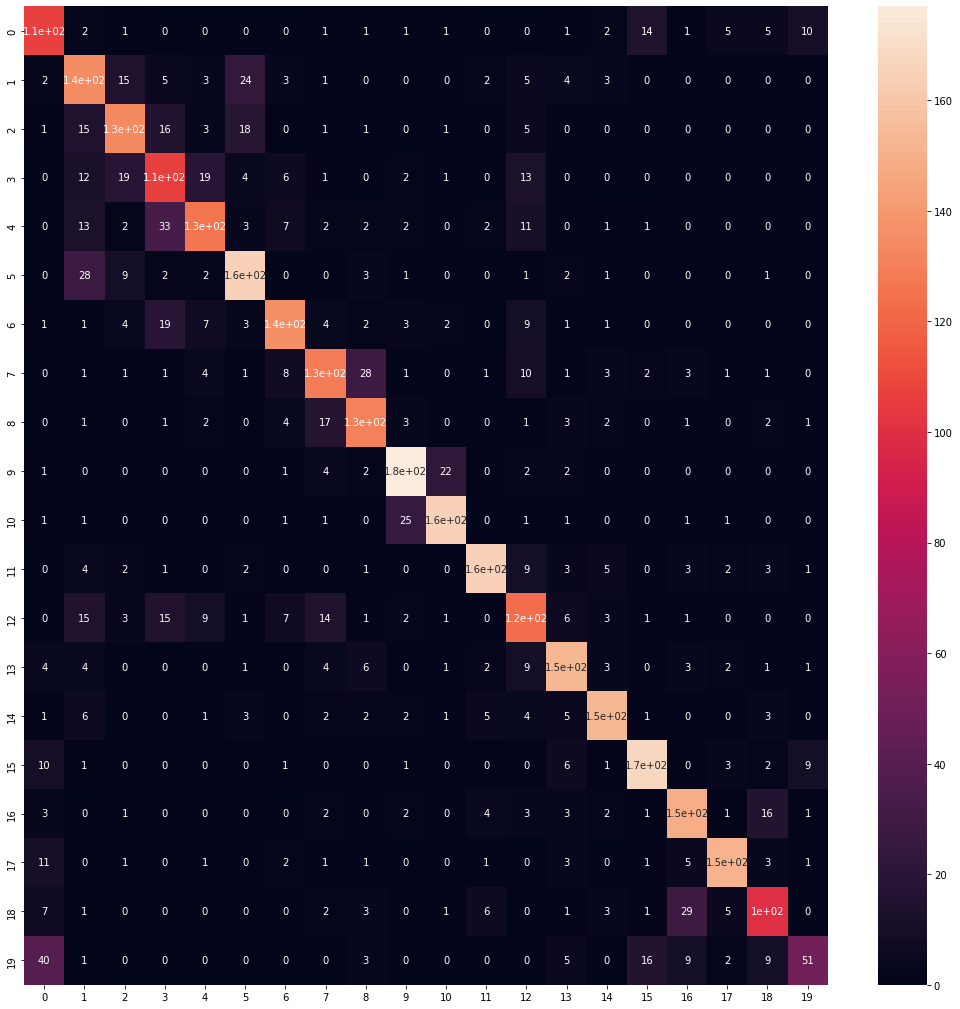

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,18))  
sns.heatmap(cf2,annot=True)

<Axes: >

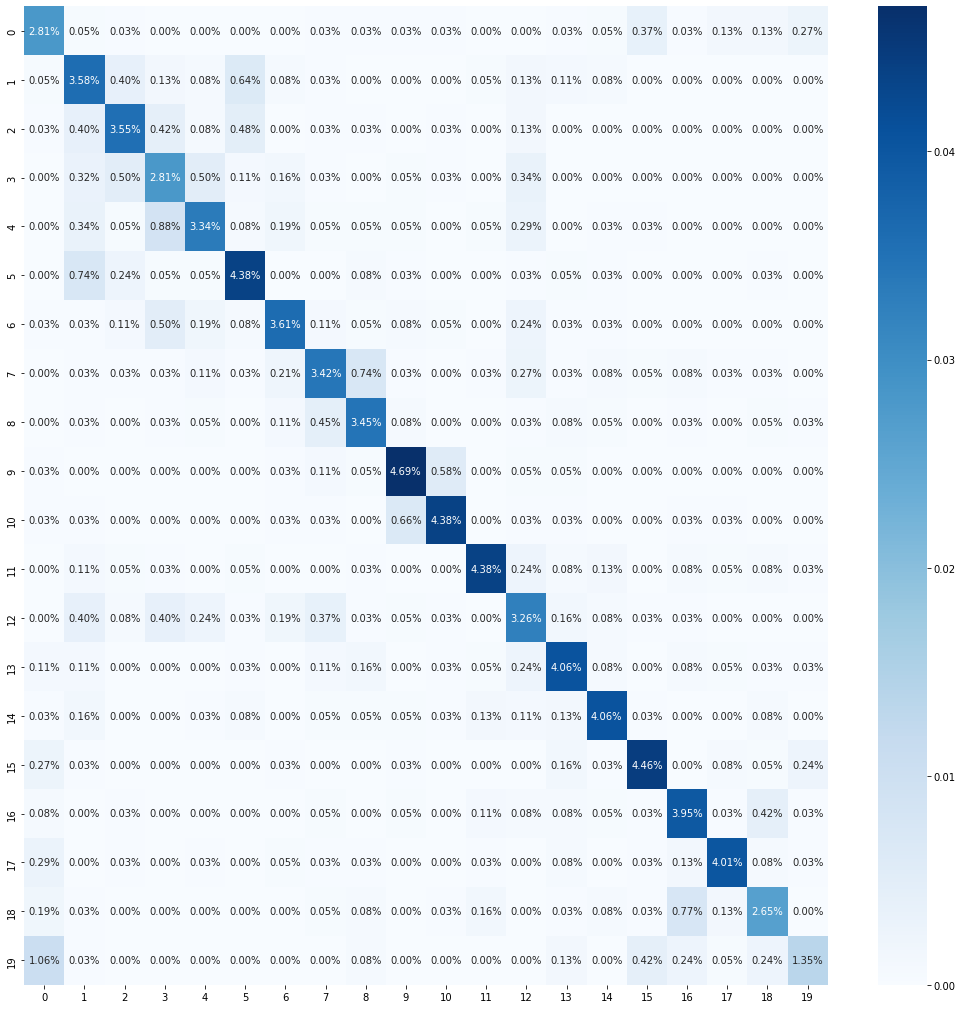

In [58]:
fig, ax = plt.subplots(figsize=(18,18))  
sns.heatmap(cf2/np.sum(cf2), annot=True, 
            fmt='.2%', cmap='Blues')

## 2. Evaluating the Bi-LSTM neural network that was coupled with Glove embeddings

In [38]:
epoch_count = range(1, len(training_loss) + 1)

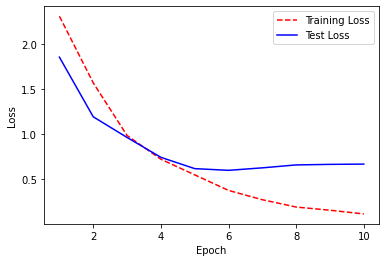

In [39]:
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

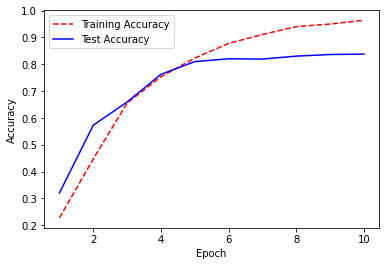

In [40]:
plt.plot(epoch_count, history.history['accuracy'], 'r--')
plt.plot(epoch_count, history.history['val_accuracy'], 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

## Evaluation metrics : 
Confusion matrix, and Accuracy Score . The accuracy score of Logistic classifier using wordtoVec was 67.05% and for SVM classifier was 72.2% .The confusion matrix for the twenty classes made to check the classwise performance. For Glove embeddings with BiLSTM classifier, the validation accuracy score after five epochs was 80.99% which was much higher than the simple ML models with wordtoVec embeddings.

## Part 5: Model Improvement Discussion

## Data imbalance
Unlike numeric data, there is no single-point solution for addressing Data imbalance. We can apply the following methods:
Data Augmentation 
It can be done by tokenizing the document into a sentence, shuffling and rejoining them to generate new texts, or replacing adjectives, verbs, etc. It's a synonym to generate different texts with the same meaning. Any pre-trained word embedding or NLTK’s wordnet can be used to find the synonym of a word.
SMOTE
SMOTE generates synthetic samples by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors
UNDERSAMPLING
It eliminates data points from the majority class randomly until the classes are balanced. There is a likelihood of information loss leading to poor model training.
OVERSAMPLING
In this case minority class instances are replicated randomly. This approach can overfit and lead to inaccurate predictions on test data.
Contractions in NLP
Contractions are combinations of words that are shortened by dropping letters and replacing them with apostrophes. In NLP, it's vital to convert the text into a presentable form using text processing, which is suitable for our task.
We can use the contractions library of Python to expand the contractions

## Ambiguity in Text
Ambiguity is one of the biggest challenges in NLP. When trying to understand the meaning of a word we consider several different aspects, such as the context in which it is used. Some words have a  meaning that changes over time and can also mean one thing in a certain domain and another in a different one. It is referred to the ability to have more than one meaning or being understood in more than one way. 
Ambiguity can be classified as Lexical, Syntactic, Semantic, Pragmatic, etc
The problem can be addressed by analyzing each sentence and creating a request to NL API.
Currently, expert.ai NL API supports five languages 

## Abbreviations, Acronyms, Initialisms, and Slang
During exploratory data analysis, we can collect all the high-frequency terms that are not standard English words. Create a dictionary for expanding these terms, and tone down the exaggeration and/or offensiveness of the expanded phrases if needed.
All the Abbreviations, Acronyms, Initialisms, and Slang can be expanded. When it comes to internet slang, one can refer to websites such as Urban Dictionary or even a simple Google search. Nevertheless, numerous internet slangs consist of initialisms that are part of exaggerated phrases containing offensive language or references to body parts. Hence, it might be necessary to moderate or soften their tone during the expansion process. For instance, the acronym "lmfao" could be expanded simply to "laughter.



# Open-AI embeddings (incomplete as the service is paid)

In [85]:
import openai

## Use OpenAI's login to get API key

In [86]:
openai.api_key='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [87]:
def get_embedding(text_to_embed):
    # Embed a line of text
    response = openai.Embedding.create(
        model= "text-embedding-ada-002",
        input=[text_to_embed]
    )
    # Extract the AI output embedding as a list of floats
    embedding = response["data"][0]["embedding"]

    return embedding

In [ ]:
get_embedding('from mamatha devineni ratnam subject pens fans reactions organization post office carnegie mellon pittsburgh pa lines nntp posting host i sure bashers pens fans pretty confused lack kind posts recent pens massacre devils actually i bit puzzled bit relieved however i going put end non pittsburghers relief bit praise pens man killing devils worse i thought jagr showed much better regular season stats he also lot fo fun watch playoffs bowman let jagr lot fun next couple games since pens going beat pulp jersey anyway i disappointed see islanders lose final regular season game pens rule')

In [1]:
from transformers import OpenAIGPTConfig, OpenAIGPTModel,OpenAIGPTTokenizer

In [ ]:
OpenAIGPTTokenizer(vocab_file='from mamatha devineni ratnam subject pens fans reactions organization post office carnegie mellon pittsburgh pa lines nntp posting host i sure bashers pens fans pretty confused lack kind posts recent pens massacre devils actually i bit puzzled bit relieved however i going put end non pittsburghers relief bit praise pens man killing devils worse i thought jagr showed much better regular season stats he also lot fo fun watch playoffs bowman let jagr lot fun next couple games since pens going beat pulp jersey anyway i disappointed see islanders lose final regular season game pens rule')

In [ ]:
from transformers import AutoTokenizer, OpenAIGPTModel
import torch

tokenizer = AutoTokenizer.from_pretrained("openai-gpt")
model = OpenAIGPTModel.from_pretrained("openai-gpt")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state